<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP3/MiniP3_Q1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from cvxopt import matrix, solvers

# Step 1: Define the data points and labels
X = np.array([[1, -1, 1],   # X1
              [-3, 1, 1],   # X2
              [-3, -1, -1], # X3
              [1, 2, 1],    # X4
              [-1, -1, 2]]) # X5
y = np.array([-1, 1, -1, -1, 1])

# Verify shapes
print("X shape:", X.shape)  # Should be (5, 3)
print("y shape:", y.shape)  # Should be (5,)

# Step 2: Compute the kernel matrix (linear kernel)
K = np.dot(X, X.T)  # Should be (5, 5)
print("K shape:", K.shape)  # Verify (5, 5)

# Step 3: Construct the QP matrices
P = np.outer(y, y) * K  # Should be (5, 5)
q = -np.ones(5)         # Should be (5,)
G = -np.eye(5)          # Should be (5, 5)
h = np.zeros(5)         # Should be (5,)
A = y.reshape(1, -1)    # Should be (1, 5)
b = np.zeros(1)         # Should be (1,)

# Convert to cvxopt.matrix with type 'd' (double)
P = matrix(P, tc='d')
q = matrix(q, tc='d')
G = matrix(G, tc='d')
h = matrix(h, tc='d')
A = matrix(A, tc='d')
b = matrix(b, tc='d')

# Verify matrix sizes
print("P size:", P.size)  # Should be 25 (5x5)
print("q size:", q.size)  # Should be 5
print("G size:", G.size)  # Should be 25 (5x5)
print("h size:", h.size)  # Should be 5
print("A size:", A.size)  # Should be 5
print("b size:", b.size)  # Should be 1

# Step 4: Solve the QP problem
sol = solvers.qp(P, q, G, h, A, b)

# Step 5: Extract the Lagrange multipliers
alpha = np.array(sol['x']).flatten()

# Identify support vectors (alpha > small threshold)
threshold = 1e-5
sv_indices = alpha > threshold
support_vectors = X[sv_indices]
sv_labels = y[sv_indices]
sv_alpha = alpha[sv_indices]

# Compute the weight vector w
w = np.sum((alpha * y)[:, np.newaxis] * X, axis=0)

# Compute the bias b by averaging over support vectors
b_svm = np.mean([y[i] - np.dot(w, X[i]) for i in range(5) if sv_indices[i]])

# Output results
print("\nOptimal alpha values:", alpha)
print("Support vector indices (0-based):", np.where(sv_indices)[0])
print("Support vectors:\n", support_vectors)
print("Weight vector w:", w)
print("Bias b:", b_svm)

# Define the decision function
def classify(x):
    return np.sign(np.dot(w, x) + b_svm)

# Classify the training points
print("\nClassifications of training points:")
for i, x in enumerate(X):
    pred = classify(x)
    print(f"X{i+1} = {x}, True label = {y[i]}, Predicted = {pred}")

X shape: (5, 3)
y shape: (5,)
K shape: (5, 5)
P size: (5, 5)
q size: (5, 1)
G size: (5, 5)
h size: (5, 1)
A size: (1, 5)
b size: (1, 1)
     pcost       dcost       gap    pres   dres
 0: -5.9490e-01 -1.6385e+00  1e+00  1e-16  1e+00
 1: -6.2133e-01 -6.3726e-01  2e-02  1e-16  9e-02
 2: -6.2500e-01 -6.2518e-01  2e-04  8e-16  5e-04
 3: -6.2500e-01 -6.2500e-01  2e-06  2e-16  5e-06
 4: -6.2500e-01 -6.2500e-01  2e-08  2e-16  5e-08
Optimal solution found.

Optimal alpha values: [0.13955648 0.25538014 0.31519007 0.17025343 0.36961983]
Support vector indices (0-based): [0 1 2 3 4]
Support vectors:
 [[ 1 -1  1]
 [-3  1  1]
 [-3 -1 -1]
 [ 1  2  1]
 [-1 -1  2]]
Weight vector w: [-4.99999984e-01  1.81471255e-09  9.99999965e-01]
Bias b: -1.4999999565869384

Classifications of training points:
X1 = [ 1 -1  1], True label = -1, Predicted = -1.0
X2 = [-3  1  1], True label = 1, Predicted = 1.0
X3 = [-3 -1 -1], True label = -1, Predicted = -1.0
X4 = [1 2 1], True label = -1, Predicted = -1.0
X5 = [-1 -1

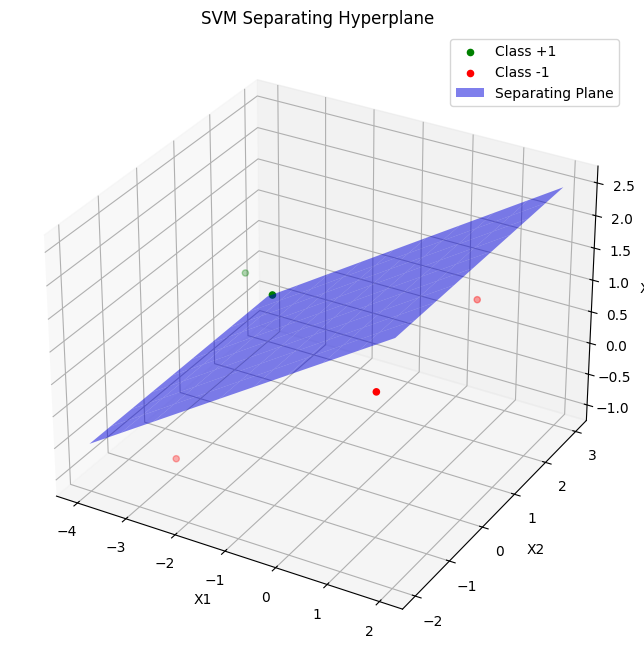

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data points and labels
X = np.array([[1, -1, 1],   # X1
              [-3, 1, 1],   # X2
              [-3, -1, -1], # X3
              [1, 2, 1],    # X4
              [-1, -1, 2]]) # X5
y = np.array([-1, 1, -1, -1, 1])

# SVM parameters from output
w = np.array([-4.99999984e-01, 1.81471255e-09, 9.9999965e-01])
b = -1.49999965e+00

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot positive class (y = 1) in green
pos_indices = np.where(y == 1)[0]
ax.scatter(X[pos_indices, 0], X[pos_indices, 1], X[pos_indices, 2], c='g', label='Class +1')

# Plot negative class (y = -1) in red
neg_indices = np.where(y == -1)[0]
ax.scatter(X[neg_indices, 0], X[neg_indices, 1], X[neg_indices, 2], c='r', label='Class -1')

# Create a meshgrid for the plane
x1 = np.linspace(-4, 2, 10)
x2 = np.linspace(-2, 3, 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = 0.5 * x1 + 1.5  # Plane equation: x3 = 0.5 x1 + 1.5

# Plot the separating plane
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5, label='Separating Plane')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('SVM Separating Hyperplane')
ax.legend()

# Show plot
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Data points and labels
X = np.array([[1, -1, 1],   # X1
              [-3, 1, 1],   # X2
              [-3, -1, -1], # X3
              [1, 2, 1],    # X4
              [-1, -1, 2]]) # X5
y = np.array([-1, 1, -1, -1, 1])

# SVM parameters from output
w = np.array([-4.99999984e-01, 1.81471255e-09, 9.9999965e-01])
b = -1.49999965e+00

# Create a Plotly figure
fig = go.Figure()

# Plot positive class (y = 1) in green
pos_indices = np.where(y == 1)[0]
fig.add_trace(go.Scatter3d(
    x=X[pos_indices, 0],
    y=X[pos_indices, 1],
    z=X[pos_indices, 2],
    mode='markers',
    marker=dict(size=8, color='green'),
    name='Class +1'
))

# Plot negative class (y = -1) in red
neg_indices = np.where(y == -1)[0]
fig.add_trace(go.Scatter3d(
    x=X[neg_indices, 0],
    y=X[neg_indices, 1],
    z=X[neg_indices, 2],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='Class -1'
))

# Create a meshgrid for the plane
x1 = np.linspace(-4, 2, 20)
x2 = np.linspace(-2, 3, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = 0.5 * x1 + 1.5  # Plane equation: x3 = 0.5 x1 + 1.5

# Plot the separating plane
fig.add_trace(go.Surface(
    x=x1,
    y=x2,
    z=x3,
    colorscale='Blues',
    opacity=0.5,
    showscale=False,
    name='Separating Plane'
))

# Update layout for better visualization
fig.update_layout(
    title='Interactive SVM Separating Hyperplane',
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()